In [1]:
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
from datetime import datetime


import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
import itertools


from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
def str_to_date(date):
    return datetime.strptime(date, '%Y-%m-%d').date()

In [3]:

df_train = pd.read_csv(r"C:\Users\Lenovo\Desktop\final project\train.csv",sep=',', parse_dates=['Date']
                       , date_parser=str_to_date,
                       low_memory = False)

df_store = pd.read_csv(r"C:\Users\Lenovo\Desktop\final project\store.csv"
                       , low_memory = False)
df_test = pd.read_csv(r"C:\Users\Lenovo\Desktop\final project\test.csv",sep=',', parse_dates=['Date']
                       , date_parser=str_to_date,
                       low_memory = False)

In [4]:
df_train[:].isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [5]:
# we want to get rid of extreme values by dropping
df_train=df_train.drop(df_train[(df_train.Open == 0) & (df_train.Sales == 0)].index)

In [6]:
df_train = df_train.reset_index(drop=True) #making sure the indexes are back to [0,1,2,3 etc.]

In [7]:
#we see here a minimum of 0 which means some stores even opened got 0 sales on some days.
df_train=df_train.drop(df_train[(df_train.Open == 1) & (df_train.Sales == 0)].index)
df_train = df_train.reset_index(drop=True) 

Text(0.5, 1.0, 'Sales histogram')

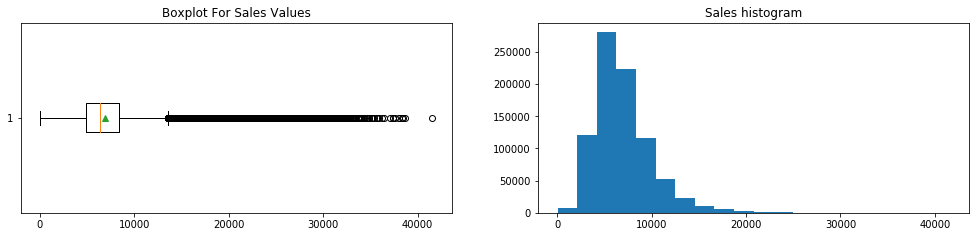

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_train.Sales, showmeans=True,vert=False)
axes[0].set_title('Boxplot For Sales Values')
axes[1].hist(df_train.Sales, cumulative=False, bins=20)
axes[1].set_title("Sales histogram")

Text(0.5, 1.0, 'Customers histogram')

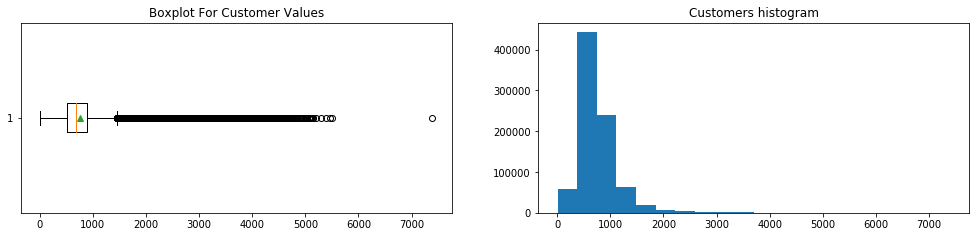

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_train.Customers, showmeans=True,vert=False)
axes[0].set_title('Boxplot For Customer Values')
axes[1].hist(df_train.Customers, cumulative=False, bins=20)
axes[1].set_title("Customers histogram")

In [10]:
stats.pearsonr(df_train.Customers, df_train.Sales)[0]  #see the high correlation between sales and customers

0.8235517202000214

In [11]:
df_store.count(0)/df_store.shape[0] * 100

Store                        100.000000
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance           99.730942
CompetitionOpenSinceMonth     68.251121
CompetitionOpenSinceYear      68.251121
Promo2                       100.000000
Promo2SinceWeek               51.210762
Promo2SinceYear               51.210762
PromoInterval                 51.210762
dtype: float64

(20.0, 75860.0)

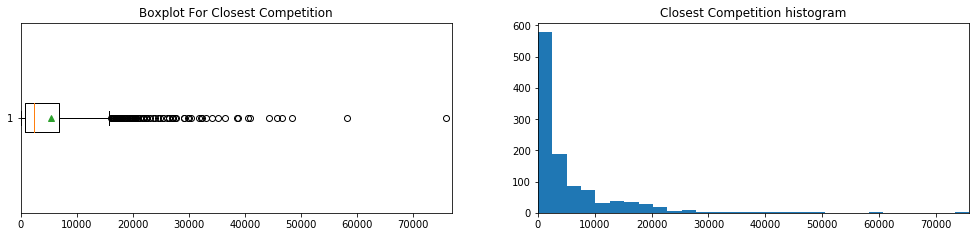

In [12]:
df_store_check_distribution=df_store.drop(df_store[pd.isnull(df_store.CompetitionDistance)].index)
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_store_check_distribution.CompetitionDistance, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df_store_check_distribution.CompetitionDistance+1000))
axes[0].set_title('Boxplot For Closest Competition')
axes[1].hist(df_store_check_distribution.CompetitionDistance, cumulative=False, bins=30)
axes[1].set_title("Closest Competition histogram")
axes[1].set_xlim((min(df_store_check_distribution.CompetitionDistance), max(df_store_check_distribution.CompetitionDistance)))


In [13]:
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)

In [14]:
df_store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
df_store.CompetitionOpenSinceYear.fillna(0,inplace=True)

In [15]:
df_store.Promo2SinceWeek.fillna(0,inplace=True)
df_store.Promo2SinceYear.fillna(0,inplace=True)
df_store.PromoInterval.fillna(0,inplace=True)

In [16]:
df_store.count(0)/df_store.shape[0] * 100

Store                        100.0
StoreType                    100.0
Assortment                   100.0
CompetitionDistance          100.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                       100.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64

In [17]:
df_train_store = pd.merge(df_train, df_store, how = 'left', on = 'Store')

In [18]:
df_train_store['SalesperCustomer']=df_train_store['Sales']/df_train_store['Customers']

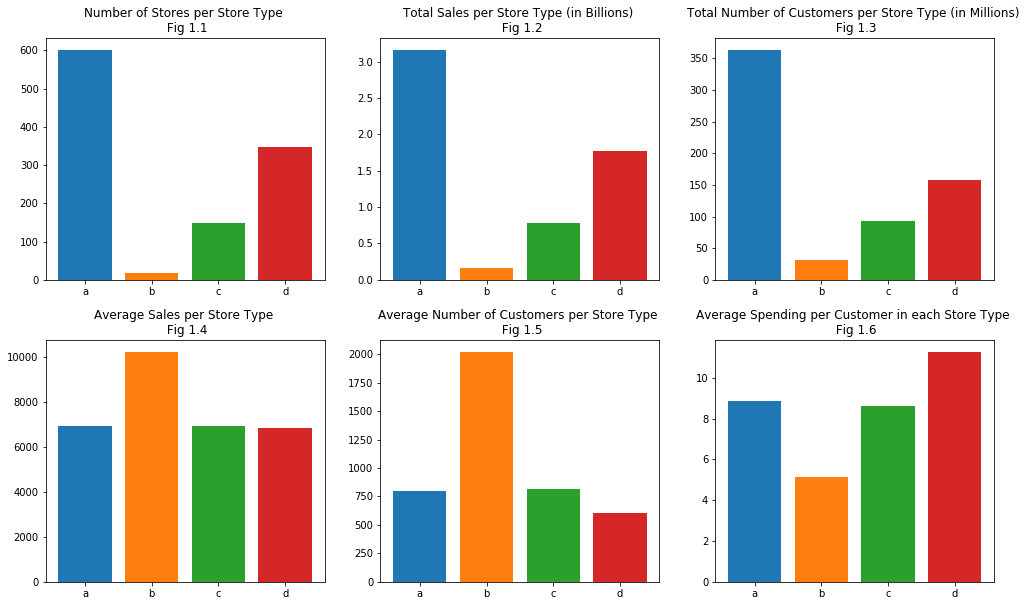

In [19]:
fig, axes = plt.subplots(2, 3,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.25)
#axes[1].df_train_store.groupby(by="StoreType").count().Store.plot(kind='bar')
axes[0,0].bar(df_store.groupby(by="StoreType").count().Store.index,df_store.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(df_train_store.groupby(by="StoreType").sum().Sales.index,df_train_store.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type (in Billions) \n Fig 1.2")
axes[0,2].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,2].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,0].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Average Sales per Store Type \n Fig 1.4")
axes[1,1].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").Customers.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Number of Customers per Store Type \n Fig 1.5")
axes[1,2].bar(df_train_store.groupby(by="StoreType").sum().Sales.index,df_train_store.groupby(by="StoreType").SalesperCustomer.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,2].set_title("Average Spending per Customer in each Store Type \n Fig 1.6")
plt.show()

In [20]:
df_train_store['Month']=df_train_store.Date.dt.month
df_train_store['Year']=df_train_store.Date.dt.year
df_train_store['Day']=df_train_store.Date.dt.day
del df_train_store["Date"]

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


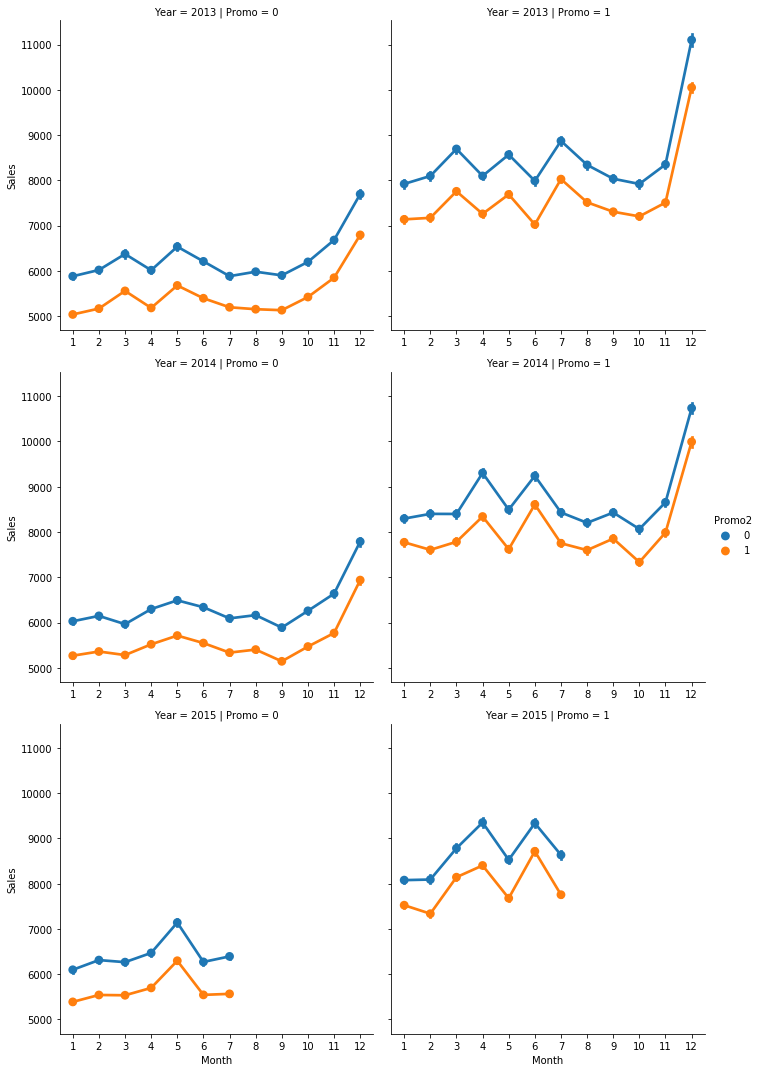

In [21]:
sns.factorplot(data = df_train_store, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
              ,sharex=False)

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


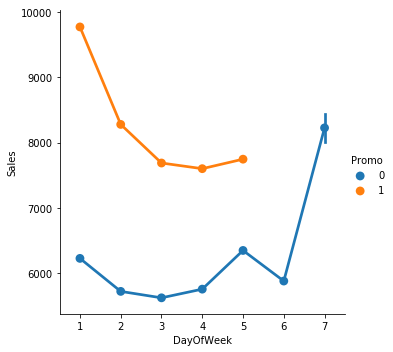

In [22]:
sns.factorplot(data = df_train_store, x ="DayOfWeek", y = "Sales",
                hue='Promo'
              ,sharex=False)

In [23]:
df_correlation=df_train_store[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo',
        'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'SalesperCustomer', 'Month', 'Year',
       'Day']]

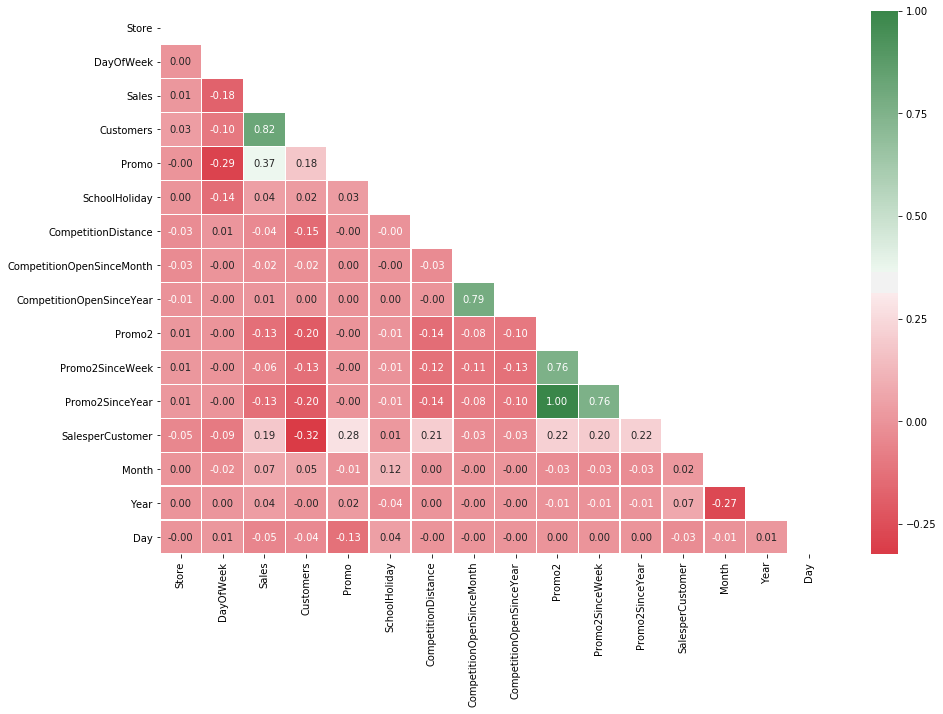

In [24]:
upper_triangle = np.zeros_like(df_correlation.corr(), dtype = np.bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True #make sure we don't show half of the other triangle
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df_correlation.corr(),ax=ax,mask=upper_triangle,annot=True, fmt='.2f',linewidths=0.5,cmap=sns.diverging_palette(10, 133, as_cmap=True))

In [25]:
df_train_store['CompetitionOpenSince'] = np.where((df_train_store['CompetitionOpenSinceMonth']==0) & (df_train_store['CompetitionOpenSinceYear']==0) , 0,(df_train_store.Month - df_train_store.CompetitionOpenSinceMonth) + 
                                       (12 * (df_train_store.Year - df_train_store.CompetitionOpenSinceYear)) )

In [26]:
#now that CompetitionOpenSince is created 
#we can get rid of `CompetitionOpenSinceYear` and `CompeitionOpenSinceMonth`
del df_train_store['CompetitionOpenSinceYear']
del df_train_store['CompetitionOpenSinceMonth']

In [27]:
df_train_store["is_holiday_state"] = df_train_store['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1})

In [28]:
#we use get dummies to make variable for each category for the categorical variables in the data
df_train_store=pd.get_dummies(df_train_store, columns=["Assortment", "StoreType","PromoInterval"], prefix=["is_Assortment", "is_StoreType","is_PromoInteval"])

In [29]:
df_test.fillna(0, inplace = True) 
#Left-join the train to the store dataset since we want to make sure you have all events even if some of them don't have their store information ( which shouldn't happen)
df_test_store = pd.merge(df_test, df_store, how = 'left', on = 'Store')
print ("The Test_Store dataset has {} Rows and {} Variables".format(str(df_test_store.shape[0]),str(df_test_store.shape[1]))) 
df_test_store['Month']=df_test_store.Date.dt.month
df_test_store['Year']=df_test_store.Date.dt.year
df_test_store['Day']=df_test_store.Date.dt.day
df_test_store['CompetitionOpenSince'] = np.where((df_test_store['CompetitionOpenSinceMonth']==0) & (df_test_store['CompetitionOpenSinceYear']==0) , 0,(df_test_store.Month - df_test_store.CompetitionOpenSinceMonth) + 
                                       (12 * (df_test_store.Year - df_test_store.CompetitionOpenSinceYear)) )
df_test_store["is_holiday_state"] = df_test_store['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1})
df_test_store=pd.get_dummies(df_test_store, columns=["Assortment", "StoreType","PromoInterval"], prefix=["is_Assortment", "is_StoreType","is_PromoInteval"])

The Test_Store dataset has 41088 Rows and 17 Variables


In [30]:
del df_test_store["Date"]
del df_test_store['CompetitionOpenSinceYear']
del df_test_store['CompetitionOpenSinceMonth']
del df_test_store['StateHoliday']
del df_train_store['StateHoliday']

In [31]:
def rmspe(y, yhat):
    rmspe = np.sqrt(np.mean( (y - yhat)**2 ))
    return rmspe

In [32]:
features = df_train_store.drop(['Customers', 'Sales', 'SalesperCustomer'], axis = 1) 
targets=np.log(df_train_store.Sales)

In [33]:
X_train, X_train_test, y_train, y_train_test = model_selection.train_test_split(features, targets, test_size=0.20, random_state=15)

In [35]:
rfr_val=RandomForestRegressor(n_estimators=16, 
                             criterion='mse', 
                             max_depth=20, 
                             min_samples_split=10, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='auto', 
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             min_impurity_split=None, 
                             bootstrap=True, 
                             oob_score=False,
                             n_jobs=4, 
                             random_state=35, 
                             verbose=0, 
                             warm_start=False)


In [36]:
model_RF_test=rfr_val.fit(X_train,y_train)

In [37]:
yhat=model_RF_test.predict(X_train_test)

In [38]:
error=rmspe(y_train_test,yhat)
error

0.16154734424797096

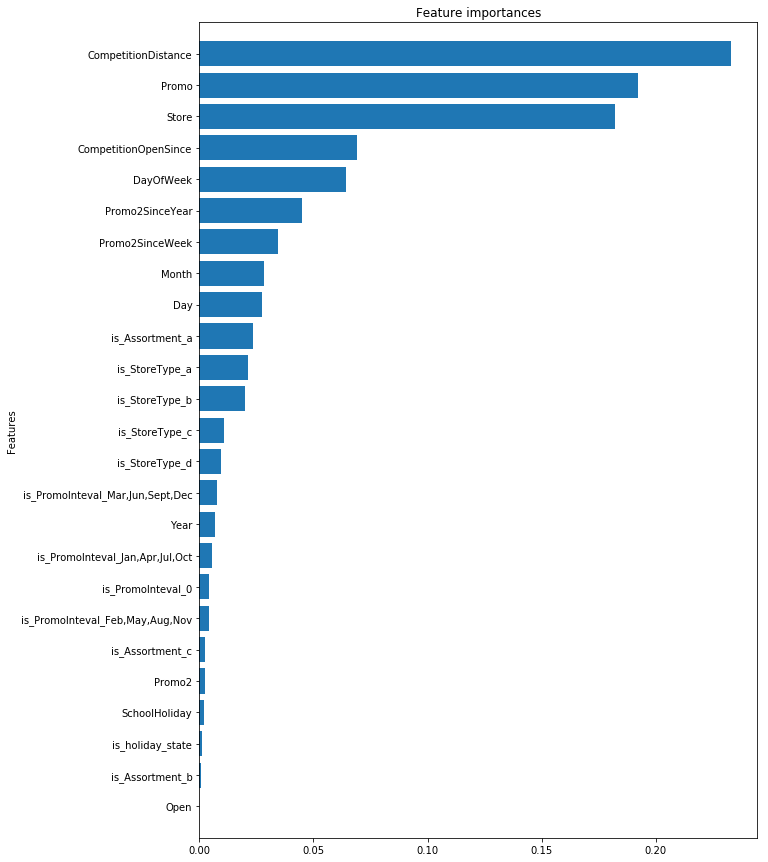

In [39]:
importances = rfr_val.feature_importances_
std = np.std([rfr_val.feature_importances_ for tree in rfr_val.estimators_],
             axis=0)
indices = np.argsort(importances)
palette1 = itertools.cycle(sns.color_palette())
# Store the feature ranking
features_ranked=[]
for f in range(X_train.shape[1]):
    features_ranked.append(X_train.columns[indices[f]])
# Plot the feature importances of the forest
plt.figure(figsize=(10,15))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
            color=[next(palette1)], align="center")
plt.yticks(range(X_train.shape[1]), features_ranked)
plt.ylabel('Features')
plt.ylim([-1, X_train.shape[1]])
plt.show()

In [40]:
df_test_store1=df_test_store.drop(['Id'],axis=1)
result_yhat= model_RF_test.predict(df_test_store1)

result_preds= pd.DataFrame({'Id': df_test_store['Id'], 
                          'Sales': np.exp(result_yhat)})
result_preds.to_csv(r"C:\Users\Hasan\Desktop\proje\Random_Forest_Forecast.csv", index = False)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Hasan\\Desktop\\proje\\Random_Forest_Forecast.csv'

In [41]:

from sklearn.model_selection import train_test_split
import xgboost as xgb
import operator
import matplotlib
matplotlib.use("Agg") #we use this in order to save feature importance graphic
import matplotlib.pyplot as plt

def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    for i, feat in enumerate(features):
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
    outfile.close()



def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

# Gather some features
def build_features(features, data):
    # remove NaNs
    data.fillna(0, inplace=True)
    data.loc[data.Open.isnull(), 'Open'] = 1
    # Use some properties directly
    features.extend(['Store', 'CompetitionDistance', 'Promo', 'Promo2', 'SchoolHoliday'])

    # Label encode some features
    features.extend(['StoreType', 'Assortment', 'StateHoliday'])
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)

    features.extend(['DayOfWeek', 'Month', 'Day', 'Year'])
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    #data['WeekOfYear'] = data.Date.dt.weekofyear


    features.append('CompetitionOpen')
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) + \
        (data.Month - data.CompetitionOpenSinceMonth)
    # Promo open time in months
    features.append('PromoOpen')
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) + \
        (data.Month - data.Promo2SinceWeek/4.0) 
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    data.loc[data.Promo2SinceYear == 0, 'PromoOpen'] = 0

    # Indicate that sales on that day are in promo interval
    features.append('IsPromoMonth')
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', \
             7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval == 0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1

    return data

In [42]:
types = {'CompetitionOpenSinceYear': np.dtype(int),
         'CompetitionOpenSinceMonth': np.dtype(int),
         'StateHoliday': np.dtype(str),
         'Promo2SinceWeek': np.dtype(int),
         'SchoolHoliday': np.dtype(float),
         'PromoInterval': np.dtype(str)}

train = pd.read_csv(r"C:\Users\Lenovo\Desktop\final project\train.csv", parse_dates=[2])
test = pd.read_csv(r"C:\Users\Lenovo\Desktop\final project\test.csv", parse_dates=[3])
store = pd.read_csv(r"C:\Users\Lenovo\Desktop\final project\store.csv")


In [43]:
#Assume store closed, if not provided
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)


In [44]:
#Consider only open stores for training.
train = train[train["Open"] != 0]
#we use only Sales bigger then zero. Simplifies calculation of rmspe
train = train[train["Sales"] > 0]

In [45]:
train = pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')


In [46]:
features = []

build_features(features, train)
build_features([], test)
print(features)

print('training data processed')

['Store', 'CompetitionDistance', 'Promo', 'Promo2', 'SchoolHoliday', 'StoreType', 'Assortment', 'StateHoliday', 'DayOfWeek', 'Month', 'Day', 'Year', 'CompetitionOpen', 'PromoOpen', 'IsPromoMonth']
training data processed


In [47]:
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.02,
          "max_depth": 10,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 31
          }
num_boost_round = 20000

In [52]:
print("Train a XGBoost model")
X_train, X_valid = train_test_split(train, test_size=0.2, random_state=10)
y_train = np.log1p(X_train.Sales)
y_valid = np.log1p(X_valid.Sales)

Train a XGBoost model


In [53]:
int_xtrain=X_train[features].astype(int)

int_xtrain.dtypes

int_xvalid= X_valid[features].astype(int)

In [54]:
def rmspe(y, yhat):
    rmspe = np.sqrt(np.mean( (y - yhat)**2 ))
    return rmspe

In [55]:
dtrain = xgb.DMatrix(int_xtrain, y_train)
dvalid = xgb.DMatrix(int_xvalid, y_valid)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds=100,  verbose_eval=True)

[0]	train-rmse:8.10345	eval-rmse:8.1044
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 100 rounds.
[1]	train-rmse:7.94172	eval-rmse:7.94266
[2]	train-rmse:7.78324	eval-rmse:7.78419
[3]	train-rmse:7.62795	eval-rmse:7.62888
[4]	train-rmse:7.47572	eval-rmse:7.47666
[5]	train-rmse:7.32662	eval-rmse:7.32754
[6]	train-rmse:7.18048	eval-rmse:7.18138
[7]	train-rmse:7.03721	eval-rmse:7.03811
[8]	train-rmse:6.89684	eval-rmse:6.89774
[9]	train-rmse:6.75931	eval-rmse:6.76019
[10]	train-rmse:6.62448	eval-rmse:6.62534
[11]	train-rmse:6.49237	eval-rmse:6.49323
[12]	train-rmse:6.36295	eval-rmse:6.36379
[13]	train-rmse:6.2361	eval-rmse:6.23695
[14]	train-rmse:6.11175	eval-rmse:6.11259
[15]	train-rmse:5.98989	eval-rmse:5.99073
[16]	train-rmse:5.87052	eval-rmse:5.87134
[17]	train-rmse:5.75354	eval-rmse:5.75435
[18]	train-rmse:5.63888	eval-rmse:5.63969
[19]	train-rmse:5.52653	eval-rmse:5.52733
[20]	train-rmse:5.41642	eval

[187]	train-rmse:0.315714	eval-rmse:0.316906
[188]	train-rmse:0.313359	eval-rmse:0.314558
[189]	train-rmse:0.311145	eval-rmse:0.312354
[190]	train-rmse:0.308588	eval-rmse:0.309798
[191]	train-rmse:0.306405	eval-rmse:0.307622
[192]	train-rmse:0.304114	eval-rmse:0.305335
[193]	train-rmse:0.30213	eval-rmse:0.303363
[194]	train-rmse:0.300239	eval-rmse:0.301484
[195]	train-rmse:0.297963	eval-rmse:0.299206
[196]	train-rmse:0.295924	eval-rmse:0.297168
[197]	train-rmse:0.294169	eval-rmse:0.29543
[198]	train-rmse:0.292502	eval-rmse:0.293767
[199]	train-rmse:0.290467	eval-rmse:0.291736
[200]	train-rmse:0.288599	eval-rmse:0.28987
[201]	train-rmse:0.286805	eval-rmse:0.288096
[202]	train-rmse:0.285116	eval-rmse:0.286413
[203]	train-rmse:0.283469	eval-rmse:0.284773
[204]	train-rmse:0.281955	eval-rmse:0.283263
[205]	train-rmse:0.280293	eval-rmse:0.281602
[206]	train-rmse:0.278763	eval-rmse:0.280083
[207]	train-rmse:0.277426	eval-rmse:0.278754
[208]	train-rmse:0.276194	eval-rmse:0.277534
[209]	train-r

[370]	train-rmse:0.196202	eval-rmse:0.198386
[371]	train-rmse:0.196065	eval-rmse:0.198262
[372]	train-rmse:0.19544	eval-rmse:0.197639
[373]	train-rmse:0.195205	eval-rmse:0.197412
[374]	train-rmse:0.194602	eval-rmse:0.196811
[375]	train-rmse:0.194484	eval-rmse:0.196695
[376]	train-rmse:0.194327	eval-rmse:0.196546
[377]	train-rmse:0.193731	eval-rmse:0.195954
[378]	train-rmse:0.193671	eval-rmse:0.195894
[379]	train-rmse:0.193573	eval-rmse:0.195798
[380]	train-rmse:0.193454	eval-rmse:0.195691
[381]	train-rmse:0.193041	eval-rmse:0.195282
[382]	train-rmse:0.19255	eval-rmse:0.194803
[383]	train-rmse:0.192354	eval-rmse:0.19461
[384]	train-rmse:0.191814	eval-rmse:0.194078
[385]	train-rmse:0.191683	eval-rmse:0.19395
[386]	train-rmse:0.191188	eval-rmse:0.193467
[387]	train-rmse:0.191084	eval-rmse:0.193374
[388]	train-rmse:0.190597	eval-rmse:0.192894
[389]	train-rmse:0.190475	eval-rmse:0.192774
[390]	train-rmse:0.189566	eval-rmse:0.191887
[391]	train-rmse:0.189016	eval-rmse:0.191354
[392]	train-rm

[553]	train-rmse:0.156973	eval-rmse:0.160299
[554]	train-rmse:0.156902	eval-rmse:0.160231
[555]	train-rmse:0.156642	eval-rmse:0.159978
[556]	train-rmse:0.15657	eval-rmse:0.159917
[557]	train-rmse:0.156541	eval-rmse:0.159889
[558]	train-rmse:0.156474	eval-rmse:0.15983
[559]	train-rmse:0.156335	eval-rmse:0.159702
[560]	train-rmse:0.156285	eval-rmse:0.159651
[561]	train-rmse:0.155971	eval-rmse:0.159342
[562]	train-rmse:0.155899	eval-rmse:0.159272
[563]	train-rmse:0.155824	eval-rmse:0.159207
[564]	train-rmse:0.155659	eval-rmse:0.159049
[565]	train-rmse:0.155473	eval-rmse:0.158864
[566]	train-rmse:0.155234	eval-rmse:0.158627
[567]	train-rmse:0.155066	eval-rmse:0.158463
[568]	train-rmse:0.154976	eval-rmse:0.158377
[569]	train-rmse:0.154868	eval-rmse:0.158272
[570]	train-rmse:0.154796	eval-rmse:0.158208
[571]	train-rmse:0.154514	eval-rmse:0.15793
[572]	train-rmse:0.154378	eval-rmse:0.157798
[573]	train-rmse:0.154327	eval-rmse:0.157751
[574]	train-rmse:0.154019	eval-rmse:0.157441
[575]	train-r

[736]	train-rmse:0.134795	eval-rmse:0.139115
[737]	train-rmse:0.134748	eval-rmse:0.139072
[738]	train-rmse:0.134565	eval-rmse:0.138891
[739]	train-rmse:0.134439	eval-rmse:0.138766
[740]	train-rmse:0.134324	eval-rmse:0.138654
[741]	train-rmse:0.13427	eval-rmse:0.138606
[742]	train-rmse:0.134164	eval-rmse:0.138506
[743]	train-rmse:0.13399	eval-rmse:0.138336
[744]	train-rmse:0.133839	eval-rmse:0.138185
[745]	train-rmse:0.133768	eval-rmse:0.13812
[746]	train-rmse:0.133633	eval-rmse:0.137986
[747]	train-rmse:0.133548	eval-rmse:0.137906
[748]	train-rmse:0.133519	eval-rmse:0.13788
[749]	train-rmse:0.133445	eval-rmse:0.137812
[750]	train-rmse:0.133329	eval-rmse:0.137696
[751]	train-rmse:0.133195	eval-rmse:0.137568
[752]	train-rmse:0.133066	eval-rmse:0.137438
[753]	train-rmse:0.132928	eval-rmse:0.137304
[754]	train-rmse:0.132798	eval-rmse:0.137182
[755]	train-rmse:0.13278	eval-rmse:0.137166
[756]	train-rmse:0.132681	eval-rmse:0.137071
[757]	train-rmse:0.132582	eval-rmse:0.136976
[758]	train-rms

[920]	train-rmse:0.120637	eval-rmse:0.125793
[921]	train-rmse:0.120578	eval-rmse:0.12574
[922]	train-rmse:0.120532	eval-rmse:0.125697
[923]	train-rmse:0.120467	eval-rmse:0.125633
[924]	train-rmse:0.120404	eval-rmse:0.125571
[925]	train-rmse:0.12026	eval-rmse:0.125435
[926]	train-rmse:0.120218	eval-rmse:0.1254
[927]	train-rmse:0.120178	eval-rmse:0.125362
[928]	train-rmse:0.120143	eval-rmse:0.12533
[929]	train-rmse:0.120102	eval-rmse:0.12529
[930]	train-rmse:0.120018	eval-rmse:0.125211
[931]	train-rmse:0.119979	eval-rmse:0.125179
[932]	train-rmse:0.119898	eval-rmse:0.125105
[933]	train-rmse:0.119841	eval-rmse:0.125051
[934]	train-rmse:0.11979	eval-rmse:0.125006
[935]	train-rmse:0.119743	eval-rmse:0.124965
[936]	train-rmse:0.119687	eval-rmse:0.12492
[937]	train-rmse:0.119676	eval-rmse:0.12491
[938]	train-rmse:0.119621	eval-rmse:0.12486
[939]	train-rmse:0.119567	eval-rmse:0.124809
[940]	train-rmse:0.119485	eval-rmse:0.124734
[941]	train-rmse:0.119429	eval-rmse:0.124686
[942]	train-rmse:0.1

[1101]	train-rmse:0.111662	eval-rmse:0.117602
[1102]	train-rmse:0.111627	eval-rmse:0.117571
[1103]	train-rmse:0.111588	eval-rmse:0.117538
[1104]	train-rmse:0.111543	eval-rmse:0.117499
[1105]	train-rmse:0.111535	eval-rmse:0.117492
[1106]	train-rmse:0.111501	eval-rmse:0.117464
[1107]	train-rmse:0.111464	eval-rmse:0.117435
[1108]	train-rmse:0.111458	eval-rmse:0.117429
[1109]	train-rmse:0.111432	eval-rmse:0.117412
[1110]	train-rmse:0.11139	eval-rmse:0.117373
[1111]	train-rmse:0.11135	eval-rmse:0.117342
[1112]	train-rmse:0.111341	eval-rmse:0.117334
[1113]	train-rmse:0.111274	eval-rmse:0.117271
[1114]	train-rmse:0.11122	eval-rmse:0.117218
[1115]	train-rmse:0.111192	eval-rmse:0.117192
[1116]	train-rmse:0.11114	eval-rmse:0.117146
[1117]	train-rmse:0.111065	eval-rmse:0.117078
[1118]	train-rmse:0.111046	eval-rmse:0.11706
[1119]	train-rmse:0.111025	eval-rmse:0.117044
[1120]	train-rmse:0.110977	eval-rmse:0.117
[1121]	train-rmse:0.110879	eval-rmse:0.116908
[1122]	train-rmse:0.110829	eval-rmse:0.116

[1280]	train-rmse:0.105077	eval-rmse:0.111754
[1281]	train-rmse:0.105051	eval-rmse:0.111732
[1282]	train-rmse:0.105012	eval-rmse:0.111698
[1283]	train-rmse:0.104973	eval-rmse:0.111664
[1284]	train-rmse:0.104953	eval-rmse:0.111646
[1285]	train-rmse:0.104914	eval-rmse:0.111613
[1286]	train-rmse:0.104906	eval-rmse:0.111607
[1287]	train-rmse:0.104894	eval-rmse:0.111597
[1288]	train-rmse:0.104872	eval-rmse:0.111579
[1289]	train-rmse:0.10485	eval-rmse:0.111559
[1290]	train-rmse:0.104844	eval-rmse:0.111554
[1291]	train-rmse:0.104788	eval-rmse:0.111503
[1292]	train-rmse:0.104747	eval-rmse:0.111466
[1293]	train-rmse:0.104722	eval-rmse:0.111442
[1294]	train-rmse:0.10468	eval-rmse:0.111406
[1295]	train-rmse:0.104619	eval-rmse:0.111349
[1296]	train-rmse:0.104613	eval-rmse:0.111344
[1297]	train-rmse:0.104603	eval-rmse:0.111338
[1298]	train-rmse:0.104596	eval-rmse:0.111334
[1299]	train-rmse:0.104573	eval-rmse:0.111316
[1300]	train-rmse:0.104542	eval-rmse:0.111288
[1301]	train-rmse:0.104524	eval-rmse

[1459]	train-rmse:0.099807	eval-rmse:0.107267
[1460]	train-rmse:0.099777	eval-rmse:0.107241
[1461]	train-rmse:0.099744	eval-rmse:0.107213
[1462]	train-rmse:0.099724	eval-rmse:0.107197
[1463]	train-rmse:0.099717	eval-rmse:0.107192
[1464]	train-rmse:0.09969	eval-rmse:0.10717
[1465]	train-rmse:0.099638	eval-rmse:0.107125
[1466]	train-rmse:0.099605	eval-rmse:0.107093
[1467]	train-rmse:0.099581	eval-rmse:0.107074
[1468]	train-rmse:0.09955	eval-rmse:0.107048
[1469]	train-rmse:0.099529	eval-rmse:0.107031
[1470]	train-rmse:0.099519	eval-rmse:0.107022
[1471]	train-rmse:0.099508	eval-rmse:0.107013
[1472]	train-rmse:0.099495	eval-rmse:0.107004
[1473]	train-rmse:0.099474	eval-rmse:0.106988
[1474]	train-rmse:0.099459	eval-rmse:0.106978
[1475]	train-rmse:0.099447	eval-rmse:0.106967
[1476]	train-rmse:0.099428	eval-rmse:0.106952
[1477]	train-rmse:0.099411	eval-rmse:0.106941
[1478]	train-rmse:0.099407	eval-rmse:0.106939
[1479]	train-rmse:0.099386	eval-rmse:0.106922
[1480]	train-rmse:0.099279	eval-rmse:

[1639]	train-rmse:0.095448	eval-rmse:0.103688
[1640]	train-rmse:0.095392	eval-rmse:0.103635
[1641]	train-rmse:0.09536	eval-rmse:0.103606
[1642]	train-rmse:0.095348	eval-rmse:0.103597
[1643]	train-rmse:0.095338	eval-rmse:0.10359
[1644]	train-rmse:0.095321	eval-rmse:0.103576
[1645]	train-rmse:0.095302	eval-rmse:0.103563
[1646]	train-rmse:0.095293	eval-rmse:0.103559
[1647]	train-rmse:0.095263	eval-rmse:0.103534
[1648]	train-rmse:0.095242	eval-rmse:0.103519
[1649]	train-rmse:0.095215	eval-rmse:0.103495
[1650]	train-rmse:0.09519	eval-rmse:0.103475
[1651]	train-rmse:0.095165	eval-rmse:0.103461
[1652]	train-rmse:0.09513	eval-rmse:0.103437
[1653]	train-rmse:0.095116	eval-rmse:0.103426
[1654]	train-rmse:0.095106	eval-rmse:0.103418
[1655]	train-rmse:0.095095	eval-rmse:0.103408
[1656]	train-rmse:0.095067	eval-rmse:0.103386
[1657]	train-rmse:0.095036	eval-rmse:0.103358
[1658]	train-rmse:0.095003	eval-rmse:0.103328
[1659]	train-rmse:0.094993	eval-rmse:0.103321
[1660]	train-rmse:0.094983	eval-rmse:0

[1818]	train-rmse:0.091901	eval-rmse:0.10093
[1819]	train-rmse:0.091865	eval-rmse:0.100901
[1820]	train-rmse:0.09185	eval-rmse:0.10089
[1821]	train-rmse:0.091831	eval-rmse:0.100879
[1822]	train-rmse:0.091806	eval-rmse:0.10086
[1823]	train-rmse:0.091792	eval-rmse:0.100849
[1824]	train-rmse:0.091768	eval-rmse:0.10083
[1825]	train-rmse:0.091749	eval-rmse:0.100817
[1826]	train-rmse:0.091739	eval-rmse:0.100809
[1827]	train-rmse:0.091713	eval-rmse:0.100788
[1828]	train-rmse:0.091693	eval-rmse:0.100772
[1829]	train-rmse:0.09169	eval-rmse:0.10077
[1830]	train-rmse:0.09168	eval-rmse:0.100762
[1831]	train-rmse:0.091651	eval-rmse:0.100737
[1832]	train-rmse:0.091636	eval-rmse:0.100724
[1833]	train-rmse:0.091606	eval-rmse:0.100697
[1834]	train-rmse:0.091592	eval-rmse:0.100686
[1835]	train-rmse:0.091573	eval-rmse:0.100671
[1836]	train-rmse:0.091534	eval-rmse:0.100634
[1837]	train-rmse:0.091518	eval-rmse:0.100624
[1838]	train-rmse:0.091505	eval-rmse:0.100615
[1839]	train-rmse:0.0915	eval-rmse:0.10061

[1998]	train-rmse:0.089138	eval-rmse:0.098907
[1999]	train-rmse:0.08911	eval-rmse:0.098886
[2000]	train-rmse:0.089092	eval-rmse:0.098873
[2001]	train-rmse:0.089081	eval-rmse:0.098866
[2002]	train-rmse:0.089067	eval-rmse:0.098859
[2003]	train-rmse:0.089047	eval-rmse:0.098845
[2004]	train-rmse:0.089018	eval-rmse:0.09882
[2005]	train-rmse:0.08901	eval-rmse:0.098814
[2006]	train-rmse:0.088987	eval-rmse:0.098797
[2007]	train-rmse:0.088979	eval-rmse:0.09879
[2008]	train-rmse:0.088962	eval-rmse:0.098778
[2009]	train-rmse:0.088946	eval-rmse:0.098767
[2010]	train-rmse:0.088937	eval-rmse:0.09876
[2011]	train-rmse:0.088916	eval-rmse:0.09875
[2012]	train-rmse:0.088894	eval-rmse:0.098733
[2013]	train-rmse:0.08888	eval-rmse:0.098724
[2014]	train-rmse:0.088863	eval-rmse:0.098711
[2015]	train-rmse:0.08885	eval-rmse:0.098703
[2016]	train-rmse:0.088845	eval-rmse:0.098701
[2017]	train-rmse:0.088834	eval-rmse:0.098693
[2018]	train-rmse:0.08882	eval-rmse:0.098682
[2019]	train-rmse:0.088815	eval-rmse:0.0986

[2177]	train-rmse:0.086616	eval-rmse:0.097159
[2178]	train-rmse:0.0866	eval-rmse:0.09715
[2179]	train-rmse:0.086588	eval-rmse:0.097142
[2180]	train-rmse:0.086574	eval-rmse:0.097131
[2181]	train-rmse:0.086565	eval-rmse:0.097124
[2182]	train-rmse:0.08655	eval-rmse:0.097114
[2183]	train-rmse:0.086546	eval-rmse:0.097112
[2184]	train-rmse:0.086541	eval-rmse:0.097107
[2185]	train-rmse:0.086532	eval-rmse:0.097101
[2186]	train-rmse:0.086522	eval-rmse:0.097096
[2187]	train-rmse:0.086514	eval-rmse:0.09709
[2188]	train-rmse:0.086509	eval-rmse:0.097088
[2189]	train-rmse:0.086499	eval-rmse:0.097083
[2190]	train-rmse:0.086479	eval-rmse:0.097068
[2191]	train-rmse:0.086472	eval-rmse:0.097063
[2192]	train-rmse:0.086462	eval-rmse:0.097057
[2193]	train-rmse:0.086453	eval-rmse:0.097053
[2194]	train-rmse:0.086446	eval-rmse:0.097047
[2195]	train-rmse:0.086432	eval-rmse:0.097041
[2196]	train-rmse:0.086422	eval-rmse:0.097034
[2197]	train-rmse:0.086407	eval-rmse:0.097026
[2198]	train-rmse:0.086399	eval-rmse:0.

[2356]	train-rmse:0.084591	eval-rmse:0.095827
[2357]	train-rmse:0.084581	eval-rmse:0.095821
[2358]	train-rmse:0.084565	eval-rmse:0.095809
[2359]	train-rmse:0.084556	eval-rmse:0.095804
[2360]	train-rmse:0.084547	eval-rmse:0.095798
[2361]	train-rmse:0.084533	eval-rmse:0.095787
[2362]	train-rmse:0.08452	eval-rmse:0.095778
[2363]	train-rmse:0.084509	eval-rmse:0.095773
[2364]	train-rmse:0.084499	eval-rmse:0.095767
[2365]	train-rmse:0.084485	eval-rmse:0.095759
[2366]	train-rmse:0.084479	eval-rmse:0.095756
[2367]	train-rmse:0.084465	eval-rmse:0.095748
[2368]	train-rmse:0.084455	eval-rmse:0.09574
[2369]	train-rmse:0.084446	eval-rmse:0.095735
[2370]	train-rmse:0.084436	eval-rmse:0.095728
[2371]	train-rmse:0.084429	eval-rmse:0.095726
[2372]	train-rmse:0.084408	eval-rmse:0.095712
[2373]	train-rmse:0.084401	eval-rmse:0.095707
[2374]	train-rmse:0.084393	eval-rmse:0.095704
[2375]	train-rmse:0.084378	eval-rmse:0.095693
[2376]	train-rmse:0.084366	eval-rmse:0.095685
[2377]	train-rmse:0.084351	eval-rmse

[2536]	train-rmse:0.082695	eval-rmse:0.094661
[2537]	train-rmse:0.082682	eval-rmse:0.094656
[2538]	train-rmse:0.082677	eval-rmse:0.094655
[2539]	train-rmse:0.082667	eval-rmse:0.094649
[2540]	train-rmse:0.082661	eval-rmse:0.094646
[2541]	train-rmse:0.082655	eval-rmse:0.094642
[2542]	train-rmse:0.082649	eval-rmse:0.09464
[2543]	train-rmse:0.082639	eval-rmse:0.094636
[2544]	train-rmse:0.082627	eval-rmse:0.09463
[2545]	train-rmse:0.082619	eval-rmse:0.094625
[2546]	train-rmse:0.082607	eval-rmse:0.094622
[2547]	train-rmse:0.082598	eval-rmse:0.094616
[2548]	train-rmse:0.082587	eval-rmse:0.09461
[2549]	train-rmse:0.082573	eval-rmse:0.094603
[2550]	train-rmse:0.082555	eval-rmse:0.094591
[2551]	train-rmse:0.082547	eval-rmse:0.094587
[2552]	train-rmse:0.082539	eval-rmse:0.094582
[2553]	train-rmse:0.082534	eval-rmse:0.094579
[2554]	train-rmse:0.082525	eval-rmse:0.094574
[2555]	train-rmse:0.082512	eval-rmse:0.094565
[2556]	train-rmse:0.082505	eval-rmse:0.094563
[2557]	train-rmse:0.082499	eval-rmse:

[2715]	train-rmse:0.081065	eval-rmse:0.093753
[2716]	train-rmse:0.081051	eval-rmse:0.093743
[2717]	train-rmse:0.081042	eval-rmse:0.093738
[2718]	train-rmse:0.081028	eval-rmse:0.093729
[2719]	train-rmse:0.081018	eval-rmse:0.093723
[2720]	train-rmse:0.081008	eval-rmse:0.093718
[2721]	train-rmse:0.080999	eval-rmse:0.093715
[2722]	train-rmse:0.080995	eval-rmse:0.093714
[2723]	train-rmse:0.08099	eval-rmse:0.093712
[2724]	train-rmse:0.080987	eval-rmse:0.09371
[2725]	train-rmse:0.080979	eval-rmse:0.093707
[2726]	train-rmse:0.080971	eval-rmse:0.093704
[2727]	train-rmse:0.080969	eval-rmse:0.093703
[2728]	train-rmse:0.080962	eval-rmse:0.093699
[2729]	train-rmse:0.080954	eval-rmse:0.093694
[2730]	train-rmse:0.080944	eval-rmse:0.093689
[2731]	train-rmse:0.080932	eval-rmse:0.093682
[2732]	train-rmse:0.080922	eval-rmse:0.093677
[2733]	train-rmse:0.080914	eval-rmse:0.093672
[2734]	train-rmse:0.080909	eval-rmse:0.09367
[2735]	train-rmse:0.0809	eval-rmse:0.093667
[2736]	train-rmse:0.080887	eval-rmse:0.

[2894]	train-rmse:0.079585	eval-rmse:0.092966
[2895]	train-rmse:0.079579	eval-rmse:0.092964
[2896]	train-rmse:0.079569	eval-rmse:0.092957
[2897]	train-rmse:0.079565	eval-rmse:0.092955
[2898]	train-rmse:0.07956	eval-rmse:0.092954
[2899]	train-rmse:0.07955	eval-rmse:0.092949
[2900]	train-rmse:0.079545	eval-rmse:0.092947
[2901]	train-rmse:0.079543	eval-rmse:0.092944
[2902]	train-rmse:0.079537	eval-rmse:0.092942
[2903]	train-rmse:0.079528	eval-rmse:0.092939
[2904]	train-rmse:0.07952	eval-rmse:0.092936
[2905]	train-rmse:0.079512	eval-rmse:0.092932
[2906]	train-rmse:0.079503	eval-rmse:0.092926
[2907]	train-rmse:0.079501	eval-rmse:0.092925
[2908]	train-rmse:0.079488	eval-rmse:0.092919
[2909]	train-rmse:0.07948	eval-rmse:0.092914
[2910]	train-rmse:0.079477	eval-rmse:0.092912
[2911]	train-rmse:0.079473	eval-rmse:0.092911
[2912]	train-rmse:0.079464	eval-rmse:0.092905
[2913]	train-rmse:0.079456	eval-rmse:0.092902
[2914]	train-rmse:0.079452	eval-rmse:0.0929
[2915]	train-rmse:0.079445	eval-rmse:0.0

[3073]	train-rmse:0.078239	eval-rmse:0.092298
[3074]	train-rmse:0.078233	eval-rmse:0.092295
[3075]	train-rmse:0.078228	eval-rmse:0.092294
[3076]	train-rmse:0.078218	eval-rmse:0.092288
[3077]	train-rmse:0.078214	eval-rmse:0.092286
[3078]	train-rmse:0.078208	eval-rmse:0.092283
[3079]	train-rmse:0.078204	eval-rmse:0.092282
[3080]	train-rmse:0.078195	eval-rmse:0.092279
[3081]	train-rmse:0.078189	eval-rmse:0.092275
[3082]	train-rmse:0.078184	eval-rmse:0.092273
[3083]	train-rmse:0.078179	eval-rmse:0.092269
[3084]	train-rmse:0.078174	eval-rmse:0.092268
[3085]	train-rmse:0.078168	eval-rmse:0.092264
[3086]	train-rmse:0.078158	eval-rmse:0.092261
[3087]	train-rmse:0.078152	eval-rmse:0.092258
[3088]	train-rmse:0.078143	eval-rmse:0.092254
[3089]	train-rmse:0.078133	eval-rmse:0.092249
[3090]	train-rmse:0.078125	eval-rmse:0.092246
[3091]	train-rmse:0.078118	eval-rmse:0.092245
[3092]	train-rmse:0.078109	eval-rmse:0.092239
[3093]	train-rmse:0.078106	eval-rmse:0.092238
[3094]	train-rmse:0.078093	eval-rm

[3252]	train-rmse:0.076968	eval-rmse:0.091711
[3253]	train-rmse:0.076959	eval-rmse:0.091709
[3254]	train-rmse:0.076952	eval-rmse:0.091705
[3255]	train-rmse:0.076944	eval-rmse:0.0917
[3256]	train-rmse:0.076938	eval-rmse:0.091698
[3257]	train-rmse:0.076931	eval-rmse:0.091694
[3258]	train-rmse:0.076928	eval-rmse:0.091692
[3259]	train-rmse:0.076922	eval-rmse:0.091689
[3260]	train-rmse:0.076912	eval-rmse:0.091684
[3261]	train-rmse:0.076902	eval-rmse:0.091678
[3262]	train-rmse:0.076896	eval-rmse:0.091677
[3263]	train-rmse:0.076888	eval-rmse:0.091671
[3264]	train-rmse:0.076885	eval-rmse:0.09167
[3265]	train-rmse:0.076879	eval-rmse:0.091668
[3266]	train-rmse:0.076874	eval-rmse:0.091667
[3267]	train-rmse:0.076866	eval-rmse:0.091663
[3268]	train-rmse:0.076855	eval-rmse:0.091658
[3269]	train-rmse:0.076847	eval-rmse:0.091655
[3270]	train-rmse:0.076842	eval-rmse:0.091653
[3271]	train-rmse:0.076836	eval-rmse:0.091652
[3272]	train-rmse:0.076828	eval-rmse:0.091647
[3273]	train-rmse:0.07682	eval-rmse:0

[3432]	train-rmse:0.07579	eval-rmse:0.091184
[3433]	train-rmse:0.075788	eval-rmse:0.091183
[3434]	train-rmse:0.075782	eval-rmse:0.091182
[3435]	train-rmse:0.075771	eval-rmse:0.091177
[3436]	train-rmse:0.075762	eval-rmse:0.091174
[3437]	train-rmse:0.075757	eval-rmse:0.091173
[3438]	train-rmse:0.075754	eval-rmse:0.091172
[3439]	train-rmse:0.075749	eval-rmse:0.09117
[3440]	train-rmse:0.075743	eval-rmse:0.091168
[3441]	train-rmse:0.075736	eval-rmse:0.091165
[3442]	train-rmse:0.075732	eval-rmse:0.091164
[3443]	train-rmse:0.075728	eval-rmse:0.091162
[3444]	train-rmse:0.075722	eval-rmse:0.09116
[3445]	train-rmse:0.075716	eval-rmse:0.091157
[3446]	train-rmse:0.07571	eval-rmse:0.091155
[3447]	train-rmse:0.075702	eval-rmse:0.091151
[3448]	train-rmse:0.075696	eval-rmse:0.091149
[3449]	train-rmse:0.075688	eval-rmse:0.091144
[3450]	train-rmse:0.07568	eval-rmse:0.091142
[3451]	train-rmse:0.075677	eval-rmse:0.091141
[3452]	train-rmse:0.075664	eval-rmse:0.091137
[3453]	train-rmse:0.075659	eval-rmse:0.

[3611]	train-rmse:0.074643	eval-rmse:0.090718
[3612]	train-rmse:0.074637	eval-rmse:0.090715
[3613]	train-rmse:0.074633	eval-rmse:0.090713
[3614]	train-rmse:0.074627	eval-rmse:0.09071
[3615]	train-rmse:0.07462	eval-rmse:0.090708
[3616]	train-rmse:0.074614	eval-rmse:0.090707
[3617]	train-rmse:0.074607	eval-rmse:0.090705
[3618]	train-rmse:0.074603	eval-rmse:0.090704
[3619]	train-rmse:0.0746	eval-rmse:0.090703
[3620]	train-rmse:0.074595	eval-rmse:0.090702
[3621]	train-rmse:0.074591	eval-rmse:0.0907
[3622]	train-rmse:0.074586	eval-rmse:0.090698
[3623]	train-rmse:0.074582	eval-rmse:0.090696
[3624]	train-rmse:0.074573	eval-rmse:0.090692
[3625]	train-rmse:0.074568	eval-rmse:0.090689
[3626]	train-rmse:0.074556	eval-rmse:0.09068
[3627]	train-rmse:0.074549	eval-rmse:0.090678
[3628]	train-rmse:0.074545	eval-rmse:0.090677
[3629]	train-rmse:0.074539	eval-rmse:0.090675
[3630]	train-rmse:0.074535	eval-rmse:0.090673
[3631]	train-rmse:0.074527	eval-rmse:0.090668
[3632]	train-rmse:0.074519	eval-rmse:0.09

[3790]	train-rmse:0.073558	eval-rmse:0.090297
[3791]	train-rmse:0.073554	eval-rmse:0.090297
[3792]	train-rmse:0.07355	eval-rmse:0.090295
[3793]	train-rmse:0.073545	eval-rmse:0.090294
[3794]	train-rmse:0.073537	eval-rmse:0.090291
[3795]	train-rmse:0.073529	eval-rmse:0.090288
[3796]	train-rmse:0.073523	eval-rmse:0.090286
[3797]	train-rmse:0.073519	eval-rmse:0.090284
[3798]	train-rmse:0.073512	eval-rmse:0.090281
[3799]	train-rmse:0.073503	eval-rmse:0.090274
[3800]	train-rmse:0.073496	eval-rmse:0.090272
[3801]	train-rmse:0.07349	eval-rmse:0.09027
[3802]	train-rmse:0.073486	eval-rmse:0.090269
[3803]	train-rmse:0.07348	eval-rmse:0.090267
[3804]	train-rmse:0.073473	eval-rmse:0.090265
[3805]	train-rmse:0.073465	eval-rmse:0.090261
[3806]	train-rmse:0.073459	eval-rmse:0.090259
[3807]	train-rmse:0.073448	eval-rmse:0.090256
[3808]	train-rmse:0.073441	eval-rmse:0.090253
[3809]	train-rmse:0.07344	eval-rmse:0.090252
[3810]	train-rmse:0.073432	eval-rmse:0.090249
[3811]	train-rmse:0.073429	eval-rmse:0.

[3970]	train-rmse:0.072501	eval-rmse:0.089938
[3971]	train-rmse:0.072495	eval-rmse:0.089937
[3972]	train-rmse:0.072492	eval-rmse:0.089936
[3973]	train-rmse:0.072488	eval-rmse:0.089934
[3974]	train-rmse:0.072483	eval-rmse:0.089933
[3975]	train-rmse:0.07248	eval-rmse:0.089932
[3976]	train-rmse:0.072471	eval-rmse:0.08993
[3977]	train-rmse:0.072466	eval-rmse:0.089928
[3978]	train-rmse:0.072462	eval-rmse:0.089927
[3979]	train-rmse:0.072455	eval-rmse:0.089925
[3980]	train-rmse:0.07245	eval-rmse:0.089924
[3981]	train-rmse:0.07244	eval-rmse:0.08992
[3982]	train-rmse:0.072432	eval-rmse:0.089918
[3983]	train-rmse:0.072422	eval-rmse:0.089914
[3984]	train-rmse:0.07242	eval-rmse:0.089913
[3985]	train-rmse:0.072416	eval-rmse:0.089912
[3986]	train-rmse:0.072411	eval-rmse:0.089911
[3987]	train-rmse:0.072406	eval-rmse:0.089908
[3988]	train-rmse:0.072401	eval-rmse:0.089907
[3989]	train-rmse:0.072392	eval-rmse:0.0899
[3990]	train-rmse:0.072385	eval-rmse:0.089899
[3991]	train-rmse:0.07238	eval-rmse:0.0898

[4149]	train-rmse:0.071567	eval-rmse:0.089629
[4150]	train-rmse:0.071562	eval-rmse:0.089627
[4151]	train-rmse:0.071556	eval-rmse:0.089625
[4152]	train-rmse:0.071547	eval-rmse:0.089622
[4153]	train-rmse:0.071541	eval-rmse:0.08962
[4154]	train-rmse:0.071536	eval-rmse:0.089619
[4155]	train-rmse:0.071531	eval-rmse:0.089618
[4156]	train-rmse:0.071527	eval-rmse:0.089617
[4157]	train-rmse:0.071522	eval-rmse:0.089617
[4158]	train-rmse:0.071519	eval-rmse:0.089615
[4159]	train-rmse:0.071515	eval-rmse:0.089615
[4160]	train-rmse:0.071512	eval-rmse:0.089614
[4161]	train-rmse:0.071507	eval-rmse:0.089611
[4162]	train-rmse:0.071502	eval-rmse:0.089611
[4163]	train-rmse:0.071498	eval-rmse:0.089609
[4164]	train-rmse:0.071496	eval-rmse:0.089608
[4165]	train-rmse:0.07149	eval-rmse:0.089606
[4166]	train-rmse:0.071486	eval-rmse:0.089605
[4167]	train-rmse:0.071481	eval-rmse:0.089604
[4168]	train-rmse:0.071474	eval-rmse:0.089601
[4169]	train-rmse:0.071465	eval-rmse:0.089599
[4170]	train-rmse:0.071459	eval-rmse

[4328]	train-rmse:0.070594	eval-rmse:0.089344
[4329]	train-rmse:0.070593	eval-rmse:0.089343
[4330]	train-rmse:0.070587	eval-rmse:0.089341
[4331]	train-rmse:0.070581	eval-rmse:0.08934
[4332]	train-rmse:0.070577	eval-rmse:0.089338
[4333]	train-rmse:0.070573	eval-rmse:0.089336
[4334]	train-rmse:0.070571	eval-rmse:0.089336
[4335]	train-rmse:0.070566	eval-rmse:0.089335
[4336]	train-rmse:0.070561	eval-rmse:0.089334
[4337]	train-rmse:0.070557	eval-rmse:0.089334
[4338]	train-rmse:0.070554	eval-rmse:0.089332
[4339]	train-rmse:0.07055	eval-rmse:0.089331
[4340]	train-rmse:0.070545	eval-rmse:0.089329
[4341]	train-rmse:0.070543	eval-rmse:0.089329
[4342]	train-rmse:0.070534	eval-rmse:0.089326
[4343]	train-rmse:0.070531	eval-rmse:0.089325
[4344]	train-rmse:0.070527	eval-rmse:0.089325
[4345]	train-rmse:0.07052	eval-rmse:0.089322
[4346]	train-rmse:0.070516	eval-rmse:0.08932
[4347]	train-rmse:0.070511	eval-rmse:0.089319
[4348]	train-rmse:0.070502	eval-rmse:0.089316
[4349]	train-rmse:0.070497	eval-rmse:0

[4507]	train-rmse:0.06972	eval-rmse:0.089089
[4508]	train-rmse:0.069715	eval-rmse:0.089087
[4509]	train-rmse:0.069708	eval-rmse:0.089081
[4510]	train-rmse:0.069702	eval-rmse:0.08908
[4511]	train-rmse:0.069697	eval-rmse:0.089078
[4512]	train-rmse:0.069694	eval-rmse:0.089077
[4513]	train-rmse:0.069689	eval-rmse:0.089075
[4514]	train-rmse:0.069684	eval-rmse:0.089074
[4515]	train-rmse:0.069681	eval-rmse:0.089073
[4516]	train-rmse:0.069676	eval-rmse:0.089072
[4517]	train-rmse:0.069671	eval-rmse:0.089072
[4518]	train-rmse:0.069668	eval-rmse:0.089071
[4519]	train-rmse:0.069665	eval-rmse:0.089071
[4520]	train-rmse:0.069658	eval-rmse:0.089069
[4521]	train-rmse:0.069655	eval-rmse:0.089068
[4522]	train-rmse:0.069652	eval-rmse:0.089067
[4523]	train-rmse:0.069648	eval-rmse:0.089066
[4524]	train-rmse:0.069639	eval-rmse:0.089063
[4525]	train-rmse:0.069634	eval-rmse:0.089062
[4526]	train-rmse:0.069627	eval-rmse:0.089061
[4527]	train-rmse:0.069622	eval-rmse:0.08906
[4528]	train-rmse:0.069618	eval-rmse:

[4686]	train-rmse:0.068885	eval-rmse:0.088855
[4687]	train-rmse:0.06888	eval-rmse:0.088854
[4688]	train-rmse:0.068872	eval-rmse:0.088852
[4689]	train-rmse:0.068866	eval-rmse:0.08885
[4690]	train-rmse:0.068862	eval-rmse:0.088848
[4691]	train-rmse:0.068858	eval-rmse:0.088847
[4692]	train-rmse:0.068852	eval-rmse:0.088846
[4693]	train-rmse:0.068847	eval-rmse:0.088844
[4694]	train-rmse:0.068842	eval-rmse:0.088843
[4695]	train-rmse:0.068838	eval-rmse:0.088841
[4696]	train-rmse:0.068834	eval-rmse:0.08884
[4697]	train-rmse:0.06883	eval-rmse:0.088839
[4698]	train-rmse:0.068824	eval-rmse:0.088838
[4699]	train-rmse:0.06882	eval-rmse:0.088836
[4700]	train-rmse:0.068815	eval-rmse:0.088835
[4701]	train-rmse:0.068814	eval-rmse:0.088835
[4702]	train-rmse:0.06881	eval-rmse:0.088833
[4703]	train-rmse:0.068803	eval-rmse:0.088831
[4704]	train-rmse:0.068797	eval-rmse:0.088831
[4705]	train-rmse:0.068795	eval-rmse:0.08883
[4706]	train-rmse:0.06879	eval-rmse:0.088828
[4707]	train-rmse:0.068787	eval-rmse:0.088

[4866]	train-rmse:0.068096	eval-rmse:0.088659
[4867]	train-rmse:0.068092	eval-rmse:0.088659
[4868]	train-rmse:0.068087	eval-rmse:0.088657
[4869]	train-rmse:0.06808	eval-rmse:0.088655
[4870]	train-rmse:0.068078	eval-rmse:0.088655
[4871]	train-rmse:0.068071	eval-rmse:0.088654
[4872]	train-rmse:0.068068	eval-rmse:0.088653
[4873]	train-rmse:0.068064	eval-rmse:0.088653
[4874]	train-rmse:0.068059	eval-rmse:0.088652
[4875]	train-rmse:0.068056	eval-rmse:0.088651
[4876]	train-rmse:0.068051	eval-rmse:0.08865
[4877]	train-rmse:0.068045	eval-rmse:0.08865
[4878]	train-rmse:0.068041	eval-rmse:0.088649
[4879]	train-rmse:0.068037	eval-rmse:0.088648
[4880]	train-rmse:0.068035	eval-rmse:0.088648
[4881]	train-rmse:0.068033	eval-rmse:0.088648
[4882]	train-rmse:0.068027	eval-rmse:0.088646
[4883]	train-rmse:0.068023	eval-rmse:0.088646
[4884]	train-rmse:0.068021	eval-rmse:0.088646
[4885]	train-rmse:0.068017	eval-rmse:0.088643
[4886]	train-rmse:0.068013	eval-rmse:0.088643
[4887]	train-rmse:0.068006	eval-rmse:

[5046]	train-rmse:0.06731	eval-rmse:0.088469
[5047]	train-rmse:0.067309	eval-rmse:0.088469
[5048]	train-rmse:0.067305	eval-rmse:0.088467
[5049]	train-rmse:0.067302	eval-rmse:0.088468
[5050]	train-rmse:0.0673	eval-rmse:0.088467
[5051]	train-rmse:0.067294	eval-rmse:0.088466
[5052]	train-rmse:0.06729	eval-rmse:0.088466
[5053]	train-rmse:0.067286	eval-rmse:0.088464
[5054]	train-rmse:0.06728	eval-rmse:0.088463
[5055]	train-rmse:0.067275	eval-rmse:0.088462
[5056]	train-rmse:0.067272	eval-rmse:0.088462
[5057]	train-rmse:0.067268	eval-rmse:0.08846
[5058]	train-rmse:0.067263	eval-rmse:0.08846
[5059]	train-rmse:0.067259	eval-rmse:0.088459
[5060]	train-rmse:0.067257	eval-rmse:0.088459
[5061]	train-rmse:0.067254	eval-rmse:0.088458
[5062]	train-rmse:0.067248	eval-rmse:0.088456
[5063]	train-rmse:0.067242	eval-rmse:0.088454
[5064]	train-rmse:0.067235	eval-rmse:0.088453
[5065]	train-rmse:0.06723	eval-rmse:0.088452
[5066]	train-rmse:0.067224	eval-rmse:0.088449
[5067]	train-rmse:0.067221	eval-rmse:0.088

[5225]	train-rmse:0.06659	eval-rmse:0.088308
[5226]	train-rmse:0.066583	eval-rmse:0.088307
[5227]	train-rmse:0.066578	eval-rmse:0.088306
[5228]	train-rmse:0.066576	eval-rmse:0.088306
[5229]	train-rmse:0.066572	eval-rmse:0.088306
[5230]	train-rmse:0.066565	eval-rmse:0.088305
[5231]	train-rmse:0.066561	eval-rmse:0.088305
[5232]	train-rmse:0.066555	eval-rmse:0.088303
[5233]	train-rmse:0.066553	eval-rmse:0.088302
[5234]	train-rmse:0.066545	eval-rmse:0.088303
[5235]	train-rmse:0.066541	eval-rmse:0.088302
[5236]	train-rmse:0.066536	eval-rmse:0.0883
[5237]	train-rmse:0.066533	eval-rmse:0.0883
[5238]	train-rmse:0.066528	eval-rmse:0.088299
[5239]	train-rmse:0.066522	eval-rmse:0.088297
[5240]	train-rmse:0.066518	eval-rmse:0.088295
[5241]	train-rmse:0.066514	eval-rmse:0.088294
[5242]	train-rmse:0.066509	eval-rmse:0.088292
[5243]	train-rmse:0.066504	eval-rmse:0.088291
[5244]	train-rmse:0.066499	eval-rmse:0.088289
[5245]	train-rmse:0.066495	eval-rmse:0.088288
[5246]	train-rmse:0.06649	eval-rmse:0.0

[5404]	train-rmse:0.065858	eval-rmse:0.088155
[5405]	train-rmse:0.065853	eval-rmse:0.088155
[5406]	train-rmse:0.06585	eval-rmse:0.088154
[5407]	train-rmse:0.065846	eval-rmse:0.088153
[5408]	train-rmse:0.065841	eval-rmse:0.088153
[5409]	train-rmse:0.065838	eval-rmse:0.088151
[5410]	train-rmse:0.065836	eval-rmse:0.08815
[5411]	train-rmse:0.065832	eval-rmse:0.08815
[5412]	train-rmse:0.065825	eval-rmse:0.088148
[5413]	train-rmse:0.065821	eval-rmse:0.088147
[5414]	train-rmse:0.065817	eval-rmse:0.088147
[5415]	train-rmse:0.065814	eval-rmse:0.088146
[5416]	train-rmse:0.065809	eval-rmse:0.088144
[5417]	train-rmse:0.065808	eval-rmse:0.088143
[5418]	train-rmse:0.065803	eval-rmse:0.088143
[5419]	train-rmse:0.0658	eval-rmse:0.088143
[5420]	train-rmse:0.065798	eval-rmse:0.088143
[5421]	train-rmse:0.065796	eval-rmse:0.088142
[5422]	train-rmse:0.065791	eval-rmse:0.088141
[5423]	train-rmse:0.065789	eval-rmse:0.088141
[5424]	train-rmse:0.065784	eval-rmse:0.08814
[5425]	train-rmse:0.065783	eval-rmse:0.0

[5583]	train-rmse:0.065178	eval-rmse:0.088032
[5584]	train-rmse:0.065173	eval-rmse:0.088032
[5585]	train-rmse:0.065166	eval-rmse:0.088029
[5586]	train-rmse:0.065163	eval-rmse:0.08803
[5587]	train-rmse:0.065161	eval-rmse:0.08803
[5588]	train-rmse:0.065157	eval-rmse:0.088029
[5589]	train-rmse:0.065154	eval-rmse:0.088029
[5590]	train-rmse:0.065152	eval-rmse:0.088029
[5591]	train-rmse:0.065148	eval-rmse:0.088027
[5592]	train-rmse:0.065146	eval-rmse:0.088027
[5593]	train-rmse:0.065143	eval-rmse:0.088027
[5594]	train-rmse:0.065139	eval-rmse:0.088026
[5595]	train-rmse:0.065137	eval-rmse:0.088025
[5596]	train-rmse:0.065134	eval-rmse:0.088025
[5597]	train-rmse:0.065131	eval-rmse:0.088024
[5598]	train-rmse:0.065125	eval-rmse:0.088023
[5599]	train-rmse:0.065119	eval-rmse:0.088023
[5600]	train-rmse:0.065115	eval-rmse:0.088022
[5601]	train-rmse:0.065113	eval-rmse:0.088021
[5602]	train-rmse:0.065111	eval-rmse:0.088021
[5603]	train-rmse:0.065106	eval-rmse:0.08802
[5604]	train-rmse:0.065104	eval-rmse:

[5763]	train-rmse:0.06449	eval-rmse:0.087901
[5764]	train-rmse:0.064484	eval-rmse:0.0879
[5765]	train-rmse:0.064479	eval-rmse:0.087899
[5766]	train-rmse:0.064473	eval-rmse:0.087899
[5767]	train-rmse:0.06447	eval-rmse:0.087899
[5768]	train-rmse:0.064469	eval-rmse:0.087898
[5769]	train-rmse:0.064465	eval-rmse:0.087897
[5770]	train-rmse:0.064464	eval-rmse:0.087897
[5771]	train-rmse:0.06446	eval-rmse:0.087896
[5772]	train-rmse:0.064456	eval-rmse:0.087896
[5773]	train-rmse:0.064451	eval-rmse:0.087896
[5774]	train-rmse:0.06445	eval-rmse:0.087895
[5775]	train-rmse:0.064447	eval-rmse:0.087894
[5776]	train-rmse:0.064441	eval-rmse:0.087892
[5777]	train-rmse:0.064437	eval-rmse:0.08789
[5778]	train-rmse:0.064435	eval-rmse:0.08789
[5779]	train-rmse:0.064429	eval-rmse:0.08789
[5780]	train-rmse:0.064426	eval-rmse:0.087889
[5781]	train-rmse:0.064421	eval-rmse:0.087887
[5782]	train-rmse:0.064417	eval-rmse:0.087887
[5783]	train-rmse:0.064414	eval-rmse:0.087887
[5784]	train-rmse:0.064409	eval-rmse:0.0878

[5943]	train-rmse:0.063823	eval-rmse:0.08778
[5944]	train-rmse:0.063819	eval-rmse:0.08778
[5945]	train-rmse:0.063817	eval-rmse:0.087779
[5946]	train-rmse:0.063814	eval-rmse:0.087779
[5947]	train-rmse:0.06381	eval-rmse:0.087778
[5948]	train-rmse:0.063806	eval-rmse:0.087778
[5949]	train-rmse:0.063805	eval-rmse:0.087778
[5950]	train-rmse:0.063801	eval-rmse:0.087777
[5951]	train-rmse:0.063798	eval-rmse:0.087777
[5952]	train-rmse:0.063795	eval-rmse:0.087776
[5953]	train-rmse:0.063793	eval-rmse:0.087776
[5954]	train-rmse:0.063789	eval-rmse:0.087776
[5955]	train-rmse:0.063786	eval-rmse:0.087775
[5956]	train-rmse:0.063784	eval-rmse:0.087774
[5957]	train-rmse:0.06378	eval-rmse:0.087774
[5958]	train-rmse:0.063776	eval-rmse:0.087774
[5959]	train-rmse:0.063772	eval-rmse:0.087774
[5960]	train-rmse:0.063768	eval-rmse:0.087773
[5961]	train-rmse:0.063765	eval-rmse:0.087773
[5962]	train-rmse:0.063764	eval-rmse:0.087772
[5963]	train-rmse:0.063758	eval-rmse:0.087771
[5964]	train-rmse:0.063756	eval-rmse:0

[6123]	train-rmse:0.063197	eval-rmse:0.087683
[6124]	train-rmse:0.063191	eval-rmse:0.087681
[6125]	train-rmse:0.063188	eval-rmse:0.087681
[6126]	train-rmse:0.063184	eval-rmse:0.08768
[6127]	train-rmse:0.06318	eval-rmse:0.087679
[6128]	train-rmse:0.063177	eval-rmse:0.087679
[6129]	train-rmse:0.063175	eval-rmse:0.087678
[6130]	train-rmse:0.06317	eval-rmse:0.087676
[6131]	train-rmse:0.063168	eval-rmse:0.087676
[6132]	train-rmse:0.063163	eval-rmse:0.087676
[6133]	train-rmse:0.063161	eval-rmse:0.087675
[6134]	train-rmse:0.063157	eval-rmse:0.087674
[6135]	train-rmse:0.063153	eval-rmse:0.087674
[6136]	train-rmse:0.06315	eval-rmse:0.087673
[6137]	train-rmse:0.063148	eval-rmse:0.087672
[6138]	train-rmse:0.063145	eval-rmse:0.087672
[6139]	train-rmse:0.063139	eval-rmse:0.087671
[6140]	train-rmse:0.063136	eval-rmse:0.087671
[6141]	train-rmse:0.063133	eval-rmse:0.08767
[6142]	train-rmse:0.063131	eval-rmse:0.08767
[6143]	train-rmse:0.063127	eval-rmse:0.08767
[6144]	train-rmse:0.06312	eval-rmse:0.087

[6302]	train-rmse:0.062576	eval-rmse:0.087586
[6303]	train-rmse:0.06257	eval-rmse:0.087586
[6304]	train-rmse:0.062567	eval-rmse:0.087586
[6305]	train-rmse:0.062562	eval-rmse:0.087585
[6306]	train-rmse:0.062558	eval-rmse:0.087584
[6307]	train-rmse:0.062553	eval-rmse:0.087583
[6308]	train-rmse:0.062551	eval-rmse:0.087583
[6309]	train-rmse:0.062549	eval-rmse:0.087583
[6310]	train-rmse:0.062546	eval-rmse:0.087582
[6311]	train-rmse:0.062542	eval-rmse:0.087582
[6312]	train-rmse:0.062539	eval-rmse:0.087581
[6313]	train-rmse:0.062536	eval-rmse:0.08758
[6314]	train-rmse:0.062534	eval-rmse:0.08758
[6315]	train-rmse:0.062532	eval-rmse:0.08758
[6316]	train-rmse:0.062528	eval-rmse:0.08758
[6317]	train-rmse:0.062525	eval-rmse:0.08758
[6318]	train-rmse:0.062522	eval-rmse:0.08758
[6319]	train-rmse:0.06252	eval-rmse:0.08758
[6320]	train-rmse:0.062516	eval-rmse:0.087579
[6321]	train-rmse:0.062514	eval-rmse:0.087579
[6322]	train-rmse:0.062511	eval-rmse:0.087578
[6323]	train-rmse:0.062506	eval-rmse:0.0875

[6482]	train-rmse:0.061996	eval-rmse:0.087507
[6483]	train-rmse:0.061993	eval-rmse:0.087506
[6484]	train-rmse:0.061988	eval-rmse:0.087506
[6485]	train-rmse:0.061985	eval-rmse:0.087505
[6486]	train-rmse:0.061981	eval-rmse:0.087504
[6487]	train-rmse:0.061978	eval-rmse:0.087504
[6488]	train-rmse:0.061974	eval-rmse:0.087504
[6489]	train-rmse:0.061971	eval-rmse:0.087503
[6490]	train-rmse:0.061968	eval-rmse:0.087503
[6491]	train-rmse:0.061965	eval-rmse:0.087502
[6492]	train-rmse:0.06196	eval-rmse:0.087502
[6493]	train-rmse:0.061956	eval-rmse:0.087502
[6494]	train-rmse:0.061951	eval-rmse:0.087502
[6495]	train-rmse:0.061948	eval-rmse:0.087502
[6496]	train-rmse:0.061946	eval-rmse:0.087501
[6497]	train-rmse:0.061942	eval-rmse:0.087501
[6498]	train-rmse:0.061939	eval-rmse:0.0875
[6499]	train-rmse:0.061935	eval-rmse:0.0875
[6500]	train-rmse:0.061932	eval-rmse:0.087499
[6501]	train-rmse:0.06193	eval-rmse:0.087499
[6502]	train-rmse:0.061927	eval-rmse:0.087499
[6503]	train-rmse:0.061924	eval-rmse:0.0

[6661]	train-rmse:0.061398	eval-rmse:0.087436
[6662]	train-rmse:0.061396	eval-rmse:0.087436
[6663]	train-rmse:0.061391	eval-rmse:0.087436
[6664]	train-rmse:0.061387	eval-rmse:0.087436
[6665]	train-rmse:0.061385	eval-rmse:0.087435
[6666]	train-rmse:0.061381	eval-rmse:0.087434
[6667]	train-rmse:0.061377	eval-rmse:0.087434
[6668]	train-rmse:0.061375	eval-rmse:0.087434
[6669]	train-rmse:0.061371	eval-rmse:0.087434
[6670]	train-rmse:0.061368	eval-rmse:0.087433
[6671]	train-rmse:0.061364	eval-rmse:0.087431
[6672]	train-rmse:0.061359	eval-rmse:0.087431
[6673]	train-rmse:0.061356	eval-rmse:0.087431
[6674]	train-rmse:0.061353	eval-rmse:0.08743
[6675]	train-rmse:0.061348	eval-rmse:0.08743
[6676]	train-rmse:0.061345	eval-rmse:0.087429
[6677]	train-rmse:0.061342	eval-rmse:0.087429
[6678]	train-rmse:0.061338	eval-rmse:0.087429
[6679]	train-rmse:0.061336	eval-rmse:0.087428
[6680]	train-rmse:0.061333	eval-rmse:0.087428
[6681]	train-rmse:0.06133	eval-rmse:0.087428
[6682]	train-rmse:0.061326	eval-rmse:

[6840]	train-rmse:0.060836	eval-rmse:0.087372
[6841]	train-rmse:0.060832	eval-rmse:0.087371
[6842]	train-rmse:0.060828	eval-rmse:0.087369
[6843]	train-rmse:0.060825	eval-rmse:0.087369
[6844]	train-rmse:0.060821	eval-rmse:0.087368
[6845]	train-rmse:0.060817	eval-rmse:0.087368
[6846]	train-rmse:0.060814	eval-rmse:0.087367
[6847]	train-rmse:0.06081	eval-rmse:0.087365
[6848]	train-rmse:0.060805	eval-rmse:0.087364
[6849]	train-rmse:0.060802	eval-rmse:0.087364
[6850]	train-rmse:0.0608	eval-rmse:0.087364
[6851]	train-rmse:0.060797	eval-rmse:0.087364
[6852]	train-rmse:0.060796	eval-rmse:0.087364
[6853]	train-rmse:0.060794	eval-rmse:0.087364
[6854]	train-rmse:0.06079	eval-rmse:0.087363
[6855]	train-rmse:0.060787	eval-rmse:0.087362
[6856]	train-rmse:0.060786	eval-rmse:0.087362
[6857]	train-rmse:0.060783	eval-rmse:0.087361
[6858]	train-rmse:0.060778	eval-rmse:0.08736
[6859]	train-rmse:0.060775	eval-rmse:0.08736
[6860]	train-rmse:0.060771	eval-rmse:0.087359
[6861]	train-rmse:0.060769	eval-rmse:0.0

[7020]	train-rmse:0.060309	eval-rmse:0.087294
[7021]	train-rmse:0.060306	eval-rmse:0.087294
[7022]	train-rmse:0.060302	eval-rmse:0.087294
[7023]	train-rmse:0.060295	eval-rmse:0.087293
[7024]	train-rmse:0.060294	eval-rmse:0.087293
[7025]	train-rmse:0.060293	eval-rmse:0.087293
[7026]	train-rmse:0.060289	eval-rmse:0.087292
[7027]	train-rmse:0.060285	eval-rmse:0.087292
[7028]	train-rmse:0.060281	eval-rmse:0.087292
[7029]	train-rmse:0.060279	eval-rmse:0.087292
[7030]	train-rmse:0.060278	eval-rmse:0.087292
[7031]	train-rmse:0.060274	eval-rmse:0.087292
[7032]	train-rmse:0.060271	eval-rmse:0.087292
[7033]	train-rmse:0.060269	eval-rmse:0.087292
[7034]	train-rmse:0.060265	eval-rmse:0.087292
[7035]	train-rmse:0.060262	eval-rmse:0.087291
[7036]	train-rmse:0.060259	eval-rmse:0.087291
[7037]	train-rmse:0.060256	eval-rmse:0.08729
[7038]	train-rmse:0.060251	eval-rmse:0.087289
[7039]	train-rmse:0.060248	eval-rmse:0.087289
[7040]	train-rmse:0.060247	eval-rmse:0.087289
[7041]	train-rmse:0.060244	eval-rms

[7199]	train-rmse:0.05978	eval-rmse:0.087249
[7200]	train-rmse:0.059778	eval-rmse:0.087249
[7201]	train-rmse:0.059775	eval-rmse:0.087248
[7202]	train-rmse:0.059773	eval-rmse:0.087248
[7203]	train-rmse:0.059771	eval-rmse:0.087248
[7204]	train-rmse:0.059767	eval-rmse:0.087248
[7205]	train-rmse:0.059764	eval-rmse:0.087248
[7206]	train-rmse:0.059763	eval-rmse:0.087248
[7207]	train-rmse:0.059759	eval-rmse:0.087248
[7208]	train-rmse:0.059755	eval-rmse:0.087247
[7209]	train-rmse:0.059754	eval-rmse:0.087246
[7210]	train-rmse:0.059752	eval-rmse:0.087246
[7211]	train-rmse:0.059751	eval-rmse:0.087246
[7212]	train-rmse:0.059749	eval-rmse:0.087246
[7213]	train-rmse:0.059749	eval-rmse:0.087245
[7214]	train-rmse:0.059745	eval-rmse:0.087245
[7215]	train-rmse:0.059742	eval-rmse:0.087245
[7216]	train-rmse:0.059739	eval-rmse:0.087245
[7217]	train-rmse:0.059737	eval-rmse:0.087245
[7218]	train-rmse:0.059735	eval-rmse:0.087245
[7219]	train-rmse:0.059732	eval-rmse:0.087244
[7220]	train-rmse:0.059729	eval-rms

[7378]	train-rmse:0.059267	eval-rmse:0.087202
[7379]	train-rmse:0.059265	eval-rmse:0.087202
[7380]	train-rmse:0.059261	eval-rmse:0.087202
[7381]	train-rmse:0.059257	eval-rmse:0.087202
[7382]	train-rmse:0.059253	eval-rmse:0.087201
[7383]	train-rmse:0.059251	eval-rmse:0.087201
[7384]	train-rmse:0.059249	eval-rmse:0.087201
[7385]	train-rmse:0.059244	eval-rmse:0.087201
[7386]	train-rmse:0.059241	eval-rmse:0.0872
[7387]	train-rmse:0.059238	eval-rmse:0.0872
[7388]	train-rmse:0.059234	eval-rmse:0.0872
[7389]	train-rmse:0.05923	eval-rmse:0.0872
[7390]	train-rmse:0.059228	eval-rmse:0.0872
[7391]	train-rmse:0.059225	eval-rmse:0.0872
[7392]	train-rmse:0.059221	eval-rmse:0.0872
[7393]	train-rmse:0.059218	eval-rmse:0.0872
[7394]	train-rmse:0.059215	eval-rmse:0.087199
[7395]	train-rmse:0.059211	eval-rmse:0.087198
[7396]	train-rmse:0.059208	eval-rmse:0.087199
[7397]	train-rmse:0.059204	eval-rmse:0.087198
[7398]	train-rmse:0.059202	eval-rmse:0.087198
[7399]	train-rmse:0.059199	eval-rmse:0.087198
[7400

[7558]	train-rmse:0.058752	eval-rmse:0.087164
[7559]	train-rmse:0.058747	eval-rmse:0.087164
[7560]	train-rmse:0.058744	eval-rmse:0.087163
[7561]	train-rmse:0.058739	eval-rmse:0.087162
[7562]	train-rmse:0.058739	eval-rmse:0.087162
[7563]	train-rmse:0.058737	eval-rmse:0.087162
[7564]	train-rmse:0.058734	eval-rmse:0.087162
[7565]	train-rmse:0.058732	eval-rmse:0.087162
[7566]	train-rmse:0.058728	eval-rmse:0.087161
[7567]	train-rmse:0.058724	eval-rmse:0.087162
[7568]	train-rmse:0.058723	eval-rmse:0.087162
[7569]	train-rmse:0.058721	eval-rmse:0.087162
[7570]	train-rmse:0.058718	eval-rmse:0.087161
[7571]	train-rmse:0.058715	eval-rmse:0.087161
[7572]	train-rmse:0.058711	eval-rmse:0.08716
[7573]	train-rmse:0.058707	eval-rmse:0.08716
[7574]	train-rmse:0.058706	eval-rmse:0.08716
[7575]	train-rmse:0.058703	eval-rmse:0.08716
[7576]	train-rmse:0.0587	eval-rmse:0.08716
[7577]	train-rmse:0.058696	eval-rmse:0.08716
[7578]	train-rmse:0.058694	eval-rmse:0.08716
[7579]	train-rmse:0.058693	eval-rmse:0.0871

[7737]	train-rmse:0.05825	eval-rmse:0.087128
[7738]	train-rmse:0.058248	eval-rmse:0.087127
[7739]	train-rmse:0.058247	eval-rmse:0.087127
[7740]	train-rmse:0.058245	eval-rmse:0.087127
[7741]	train-rmse:0.058241	eval-rmse:0.087126
[7742]	train-rmse:0.058238	eval-rmse:0.087126
[7743]	train-rmse:0.058236	eval-rmse:0.087126
[7744]	train-rmse:0.058233	eval-rmse:0.087126
[7745]	train-rmse:0.058228	eval-rmse:0.087126
[7746]	train-rmse:0.058226	eval-rmse:0.087126
[7747]	train-rmse:0.058223	eval-rmse:0.087125
[7748]	train-rmse:0.05822	eval-rmse:0.087125
[7749]	train-rmse:0.058216	eval-rmse:0.087124
[7750]	train-rmse:0.058213	eval-rmse:0.087123
[7751]	train-rmse:0.05821	eval-rmse:0.087123
[7752]	train-rmse:0.058209	eval-rmse:0.087123
[7753]	train-rmse:0.058206	eval-rmse:0.087122
[7754]	train-rmse:0.058204	eval-rmse:0.087122
[7755]	train-rmse:0.0582	eval-rmse:0.087122
[7756]	train-rmse:0.058199	eval-rmse:0.087122
[7757]	train-rmse:0.058195	eval-rmse:0.087122
[7758]	train-rmse:0.058194	eval-rmse:0.

[7916]	train-rmse:0.057778	eval-rmse:0.087094
[7917]	train-rmse:0.057774	eval-rmse:0.087094
[7918]	train-rmse:0.057772	eval-rmse:0.087094
[7919]	train-rmse:0.057769	eval-rmse:0.087094
[7920]	train-rmse:0.057767	eval-rmse:0.087093
[7921]	train-rmse:0.057764	eval-rmse:0.087094
[7922]	train-rmse:0.057761	eval-rmse:0.087094
[7923]	train-rmse:0.057758	eval-rmse:0.087094
[7924]	train-rmse:0.057755	eval-rmse:0.087094
[7925]	train-rmse:0.057751	eval-rmse:0.087094
[7926]	train-rmse:0.057747	eval-rmse:0.087093
[7927]	train-rmse:0.057744	eval-rmse:0.087091
[7928]	train-rmse:0.05774	eval-rmse:0.087091
[7929]	train-rmse:0.057738	eval-rmse:0.087091
[7930]	train-rmse:0.057735	eval-rmse:0.087091
[7931]	train-rmse:0.057732	eval-rmse:0.087091
[7932]	train-rmse:0.057729	eval-rmse:0.08709
[7933]	train-rmse:0.057726	eval-rmse:0.08709
[7934]	train-rmse:0.057723	eval-rmse:0.08709
[7935]	train-rmse:0.057722	eval-rmse:0.08709
[7936]	train-rmse:0.057719	eval-rmse:0.08709
[7937]	train-rmse:0.057718	eval-rmse:0.0

[8096]	train-rmse:0.057285	eval-rmse:0.087061
[8097]	train-rmse:0.057282	eval-rmse:0.08706
[8098]	train-rmse:0.057281	eval-rmse:0.08706
[8099]	train-rmse:0.057278	eval-rmse:0.087059
[8100]	train-rmse:0.057275	eval-rmse:0.087058
[8101]	train-rmse:0.057273	eval-rmse:0.087058
[8102]	train-rmse:0.057273	eval-rmse:0.087058
[8103]	train-rmse:0.05727	eval-rmse:0.087057
[8104]	train-rmse:0.057266	eval-rmse:0.087057
[8105]	train-rmse:0.057264	eval-rmse:0.087057
[8106]	train-rmse:0.057261	eval-rmse:0.087057
[8107]	train-rmse:0.057257	eval-rmse:0.087057
[8108]	train-rmse:0.057255	eval-rmse:0.087057
[8109]	train-rmse:0.057252	eval-rmse:0.087057
[8110]	train-rmse:0.05725	eval-rmse:0.087056
[8111]	train-rmse:0.057248	eval-rmse:0.087056
[8112]	train-rmse:0.057246	eval-rmse:0.087056
[8113]	train-rmse:0.057243	eval-rmse:0.087055
[8114]	train-rmse:0.057238	eval-rmse:0.087055
[8115]	train-rmse:0.057235	eval-rmse:0.087055
[8116]	train-rmse:0.057231	eval-rmse:0.087055
[8117]	train-rmse:0.057226	eval-rmse:0

[8275]	train-rmse:0.056817	eval-rmse:0.087031
[8276]	train-rmse:0.056816	eval-rmse:0.087031
[8277]	train-rmse:0.056811	eval-rmse:0.08703
[8278]	train-rmse:0.056809	eval-rmse:0.08703
[8279]	train-rmse:0.056805	eval-rmse:0.08703
[8280]	train-rmse:0.056801	eval-rmse:0.087029
[8281]	train-rmse:0.056797	eval-rmse:0.087029
[8282]	train-rmse:0.056794	eval-rmse:0.087029
[8283]	train-rmse:0.056791	eval-rmse:0.087029
[8284]	train-rmse:0.056788	eval-rmse:0.087029
[8285]	train-rmse:0.056785	eval-rmse:0.087029
[8286]	train-rmse:0.056783	eval-rmse:0.087029
[8287]	train-rmse:0.05678	eval-rmse:0.087028
[8288]	train-rmse:0.056777	eval-rmse:0.087028
[8289]	train-rmse:0.056775	eval-rmse:0.087028
[8290]	train-rmse:0.056772	eval-rmse:0.087028
[8291]	train-rmse:0.056771	eval-rmse:0.087028
[8292]	train-rmse:0.056768	eval-rmse:0.087027
[8293]	train-rmse:0.056767	eval-rmse:0.087027
[8294]	train-rmse:0.056762	eval-rmse:0.087027
[8295]	train-rmse:0.056762	eval-rmse:0.087027
[8296]	train-rmse:0.056759	eval-rmse:0

[8454]	train-rmse:0.056368	eval-rmse:0.087007
[8455]	train-rmse:0.056364	eval-rmse:0.087008
[8456]	train-rmse:0.056362	eval-rmse:0.087007
[8457]	train-rmse:0.056359	eval-rmse:0.087007
[8458]	train-rmse:0.056357	eval-rmse:0.087007
[8459]	train-rmse:0.056354	eval-rmse:0.087007
[8460]	train-rmse:0.056351	eval-rmse:0.087007
[8461]	train-rmse:0.056347	eval-rmse:0.087006
[8462]	train-rmse:0.056344	eval-rmse:0.087006
[8463]	train-rmse:0.056343	eval-rmse:0.087006
[8464]	train-rmse:0.05634	eval-rmse:0.087006
[8465]	train-rmse:0.056337	eval-rmse:0.087006
[8466]	train-rmse:0.056334	eval-rmse:0.087006
[8467]	train-rmse:0.056332	eval-rmse:0.087006
[8468]	train-rmse:0.05633	eval-rmse:0.087005
[8469]	train-rmse:0.056328	eval-rmse:0.087005
[8470]	train-rmse:0.056325	eval-rmse:0.087005
[8471]	train-rmse:0.056322	eval-rmse:0.087005
[8472]	train-rmse:0.05632	eval-rmse:0.087005
[8473]	train-rmse:0.056318	eval-rmse:0.087004
[8474]	train-rmse:0.056317	eval-rmse:0.087005
[8475]	train-rmse:0.056314	eval-rmse:

[8635]	train-rmse:0.055948	eval-rmse:0.086991
[8636]	train-rmse:0.055945	eval-rmse:0.08699
[8637]	train-rmse:0.055941	eval-rmse:0.08699
[8638]	train-rmse:0.055939	eval-rmse:0.08699
[8639]	train-rmse:0.055937	eval-rmse:0.08699
[8640]	train-rmse:0.055935	eval-rmse:0.08699
[8641]	train-rmse:0.055934	eval-rmse:0.08699
[8642]	train-rmse:0.055933	eval-rmse:0.08699
[8643]	train-rmse:0.055931	eval-rmse:0.08699
[8644]	train-rmse:0.055929	eval-rmse:0.08699
[8645]	train-rmse:0.055925	eval-rmse:0.08699
[8646]	train-rmse:0.055921	eval-rmse:0.08699
[8647]	train-rmse:0.05592	eval-rmse:0.08699
[8648]	train-rmse:0.055919	eval-rmse:0.086989
[8649]	train-rmse:0.055917	eval-rmse:0.08699
[8650]	train-rmse:0.055915	eval-rmse:0.08699
[8651]	train-rmse:0.055913	eval-rmse:0.086989
[8652]	train-rmse:0.055911	eval-rmse:0.086989
[8653]	train-rmse:0.055909	eval-rmse:0.086989
[8654]	train-rmse:0.055906	eval-rmse:0.086989
[8655]	train-rmse:0.055903	eval-rmse:0.086989
[8656]	train-rmse:0.0559	eval-rmse:0.086988
[8657

[8814]	train-rmse:0.055501	eval-rmse:0.086977
[8815]	train-rmse:0.055499	eval-rmse:0.086977
[8816]	train-rmse:0.055495	eval-rmse:0.086977
[8817]	train-rmse:0.055494	eval-rmse:0.086977
[8818]	train-rmse:0.055491	eval-rmse:0.086976
[8819]	train-rmse:0.055488	eval-rmse:0.086976
[8820]	train-rmse:0.055485	eval-rmse:0.086976
[8821]	train-rmse:0.055482	eval-rmse:0.086976
[8822]	train-rmse:0.05548	eval-rmse:0.086976
[8823]	train-rmse:0.055477	eval-rmse:0.086976
[8824]	train-rmse:0.055475	eval-rmse:0.086976
[8825]	train-rmse:0.055474	eval-rmse:0.086976
[8826]	train-rmse:0.055472	eval-rmse:0.086976
[8827]	train-rmse:0.05547	eval-rmse:0.086976
[8828]	train-rmse:0.055466	eval-rmse:0.086976
[8829]	train-rmse:0.055463	eval-rmse:0.086976
[8830]	train-rmse:0.055462	eval-rmse:0.086976
[8831]	train-rmse:0.055459	eval-rmse:0.086975
[8832]	train-rmse:0.055456	eval-rmse:0.086975
[8833]	train-rmse:0.055455	eval-rmse:0.086975
[8834]	train-rmse:0.055452	eval-rmse:0.086975
[8835]	train-rmse:0.055448	eval-rmse

[8993]	train-rmse:0.055075	eval-rmse:0.086963
[8994]	train-rmse:0.055072	eval-rmse:0.086963
[8995]	train-rmse:0.055069	eval-rmse:0.086963
[8996]	train-rmse:0.055066	eval-rmse:0.086962
[8997]	train-rmse:0.055062	eval-rmse:0.086962
[8998]	train-rmse:0.055059	eval-rmse:0.086962
[8999]	train-rmse:0.055059	eval-rmse:0.086962
[9000]	train-rmse:0.055055	eval-rmse:0.086962
[9001]	train-rmse:0.055052	eval-rmse:0.086963
[9002]	train-rmse:0.05505	eval-rmse:0.086963
[9003]	train-rmse:0.055048	eval-rmse:0.086963
[9004]	train-rmse:0.055045	eval-rmse:0.086963
[9005]	train-rmse:0.055042	eval-rmse:0.086963
[9006]	train-rmse:0.05504	eval-rmse:0.086962
[9007]	train-rmse:0.055038	eval-rmse:0.086963
[9008]	train-rmse:0.055036	eval-rmse:0.086961
[9009]	train-rmse:0.055034	eval-rmse:0.086962
[9010]	train-rmse:0.055031	eval-rmse:0.086962
[9011]	train-rmse:0.05503	eval-rmse:0.086961
[9012]	train-rmse:0.055028	eval-rmse:0.086961
[9013]	train-rmse:0.055026	eval-rmse:0.08696
[9014]	train-rmse:0.055024	eval-rmse:0

[9173]	train-rmse:0.05466	eval-rmse:0.086954
[9174]	train-rmse:0.054657	eval-rmse:0.086954
[9175]	train-rmse:0.054654	eval-rmse:0.086954
[9176]	train-rmse:0.054651	eval-rmse:0.086954
[9177]	train-rmse:0.05465	eval-rmse:0.086955
[9178]	train-rmse:0.054649	eval-rmse:0.086955
[9179]	train-rmse:0.054646	eval-rmse:0.086955
[9180]	train-rmse:0.054643	eval-rmse:0.086955
[9181]	train-rmse:0.05464	eval-rmse:0.086955
[9182]	train-rmse:0.054637	eval-rmse:0.086954
[9183]	train-rmse:0.054632	eval-rmse:0.086954
[9184]	train-rmse:0.054629	eval-rmse:0.086954
[9185]	train-rmse:0.054624	eval-rmse:0.086954
[9186]	train-rmse:0.054621	eval-rmse:0.086953
[9187]	train-rmse:0.054617	eval-rmse:0.086953
[9188]	train-rmse:0.054614	eval-rmse:0.086953
[9189]	train-rmse:0.054612	eval-rmse:0.086953
[9190]	train-rmse:0.054611	eval-rmse:0.086953
[9191]	train-rmse:0.054609	eval-rmse:0.086953
[9192]	train-rmse:0.054607	eval-rmse:0.086953
[9193]	train-rmse:0.054606	eval-rmse:0.086953
[9194]	train-rmse:0.054605	eval-rmse:

In [56]:
int_features= test[features].astype(int)

In [57]:

create_feature_map(features)
importance = gbm.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

In [58]:
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

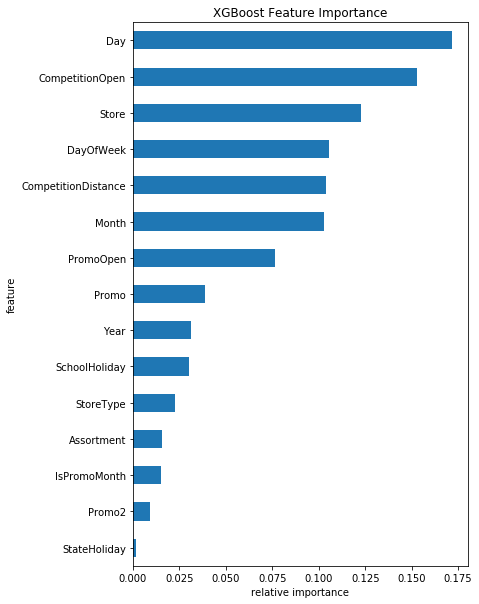

In [64]:
featp = df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
fig_featp = featp.get_figure()



In [62]:
print("Make predictions on the test set")
dtest = xgb.DMatrix(int_features)
test_probs = gbm.predict(dtest)
# Make Submission
result = pd.DataFrame({"Id": test["Id"], 'Sales': np.expm1(test_probs)})
result.to_csv(r"C:\Users\Hasan\Desktop\proje\xgboost_submission.csv", index=False)

Make predictions on the test set
